In [17]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# 0. Set preliminaries

In [2]:
# Set display settings: Turning off scientific notation and getting max column width displays
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.3f}'.format)

# 1. Load in the dataset

In [3]:
df = pd.read_csv('../Data/Combined_sets/data_rq1.tsv', header=[0,1], index_col=[0], sep='\t')

# 2. Dataset split and scaling

In [5]:
y = df[("target", "diagnosis")]
X = df.drop([("target", "diagnosis")], axis=1)

In [8]:
# Perform stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

In [11]:
# Initialize the MinMaxScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the validation and test data using the scaler fitted on the training data
X_test = scaler.transform(X_test)


# 3. Dummy Performance

In [16]:
strategies = ['most_frequent']

test_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

for s in strategies:
    if s =='constant':
        dclf = DummyClassifier(strategy = s, random_state = 0, constant =1)
    else:
        dclf = DummyClassifier(strategy = s, random_state = 0)
    dclf.fit(X_train, y_train)
    y_test_pred_dummy = dclf.predict(X_test) 

    # Calculate and store metrics
    test_scores.append(accuracy_score(y_test, y_test_pred_dummy))
    f1_scores.append(f1_score(y_test, y_test_pred_dummy, pos_label=1))
    precision_scores.append(precision_score(y_test, y_test_pred_dummy, pos_label=1))
    recall_scores.append(recall_score(y_test, y_test_pred_dummy, pos_label=1))

print("Test accuracy of the best Dummy model: ", test_scores)
print("Test precision of the best Dummy model: ", precision_scores)
print("Test recall of the best Dummy model: ", recall_scores)
print("Test f1 score of the best Dummy model: ", f1_scores)

Test accuracy of the best Dummy model:  [0.5166666666666667]
Test precision of the best Dummy model:  [0.5166666666666667]
Test recall of the best Dummy model:  [1.0]
Test f1 score of the best Dummy model:  [0.6813186813186813]


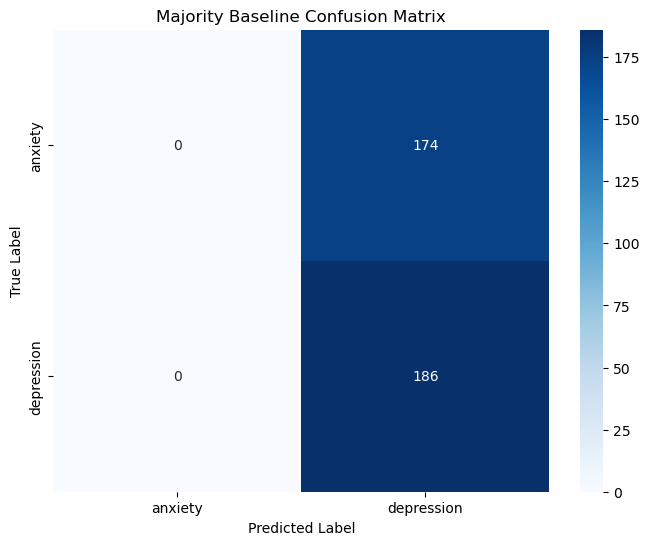

In [18]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred_dummy, labels=[0, 1])

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['anxiety', 'depression'], yticklabels=['anxiety', 'depression'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Majority Baseline Confusion Matrix')
plt.show()